# EDA- Gold Challenge Group 5

## Importing Files

In [131]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive'
/content/drive


In [132]:
%ls

MyDrive/


In [133]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading indonesian: Package 'indonesian' not found
[nltk_data]     in index


False

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
df = pd.read_csv("/content/drive/MyDrive/Kelas Data Scient/response_1690204437969.csv")
dfa = pd.read_csv("/content/drive/MyDrive/Kelas Data Scient/abusive.csv")

## DataFrame Preview

In [136]:
dfa

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [137]:
df

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu e...,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...,Negative
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,Negative
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,user jangan asal ngomong ndasmu congor lu yg s...,Negative
13165,USER Kasur mana enak kunyuk',user kasur mana enak kunyuk,Positive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,user hati hati bisu g n nlagi bosan huft xf0 x...,Neutral
13167,USER USER USER USER Bom yang real mudah terdet...,user user user user bom yang real mudah terdet...,Negative


In [138]:
df['Tweets_clean'] = df['Tweets_clean'].str.replace('user', '')
df.head()

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sara...,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...,Negative
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...,Negative


In [139]:
df.tail()

,Tweet,Tweets_clean,Sentiment
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang te...,Negative
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",mana situ ngasih itu cuma foto ya kutil onta,Negative


In [140]:
df.shape

(13169, 3)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         13169 non-null  object
 1   Tweets_clean  13169 non-null  object
 2   Sentiment     13169 non-null  object
dtypes: object(3)
memory usage: 308.8+ KB


In [142]:
df.duplicated().sum()

146

In [143]:
df.describe()

,Tweet,Tweets_clean,Sentiment
count,13169,13169,13169
unique,13023,12959,3
top,USER USER USER USER USER USER USER USER USER U...,,Negative
freq,9,12,8710


## Perhitungan Data Abusive dengan Data Tweet

In [152]:
pip install wordcloud

In [153]:
from wordcloud import WordCloud

In [154]:
abusive_words = dfa["ABUSIVE"].tolist()

In [155]:
text = ' '.join(df['Tweets_clean'])
wordcloud = WordCloud().generate(text)

In [147]:
filtered_text = ''.join(word for word in text.split() if word in abusive_words)

In [157]:
word_frequencies = {word: text.split().count(word) for word in abusive_words}

In [158]:
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

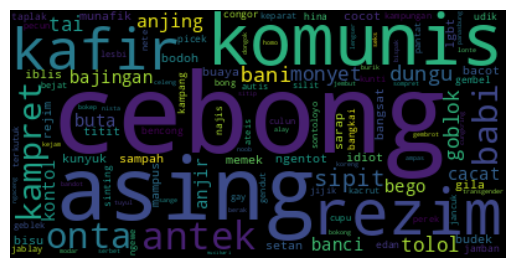

In [159]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pengaitan Abusive dengan Sentiment pada Tweet

In [161]:
abusing = dfa['ABUSIVE']
tweet = df["Tweets_clean"]

In [162]:
def contains_abusive_word(tweet):
  return any(word in tweet.lower()for word in abusing)

In [164]:
df['Contains_Abusive_Word'] = tweet.apply(contains_abusive_word)
df['Contains_Abusive_Word'] = df['Contains_Abusive_Word'].map({True: 'Yes', False: 'No'})

In [165]:
df

,Tweet,Tweets_clean,Sentiment,Contains_Abusive_word,Contains_Abusive_Word
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,True,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sara...,Negative,True,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,False,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,True,Yes
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...,Negative,True,Yes
...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative,True,Yes
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive,True,Yes
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral,True,Yes
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang te...,Negative,False,No


In [166]:
in1 = df[(df['Sentiment'] == 'Positive') & (df['Contains_Abusive_Word'] == 'Yes')]
in2 = df[(df['Sentiment'] == 'Neutral') & (df['Contains_Abusive_Word'] == 'Yes')]
in3 = df[(df['Sentiment'] == 'Negative') & (df['Contains_Abusive_Word'] == 'No')]

In [167]:
def classify_accuracy(df):
    if df['Sentiment'] in ['Positive', 'Neutral'] and df['Contains_Abusive_Word'] == 'Yes':
        return 'Inaccurate'
    elif df['Sentiment'] == 'Negative' and df['Contains_Abusive_Word'] == 'No':
        return 'Inaccurate'
    else:
        return 'Accurate'

In [168]:
df['Accuracy'] = df.apply(classify_accuracy, axis=1)

In [169]:
df

,Tweet,Tweets_clean,Sentiment,Contains_Abusive_word,Contains_Abusive_Word,Accuracy
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,True,Yes,Accurate
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sara...,Negative,True,Yes,Accurate
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,False,No,Inaccurate
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,True,Yes,Accurate
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...,Negative,True,Yes,Accurate
...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative,True,Yes,Accurate
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive,True,Yes,Inaccurate
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral,True,Yes,Inaccurate
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang te...,Negative,False,No,Inaccurate


<Axes: ylabel='Accuracy'>

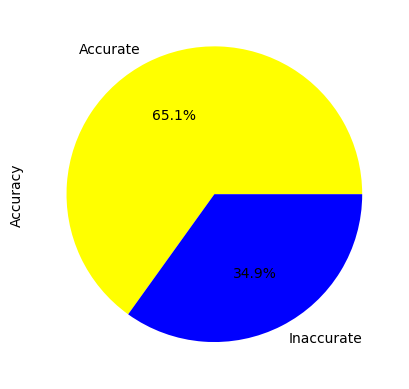

In [176]:
# pie chart
# Tingkat akurasi accurate/innacurate
df.groupby('Accuracy').Accuracy.count().plot(kind='pie',autopct='%1.1f%%',colors=['yellow','blue'])

In [177]:
df['Accuracy'].value_counts()

Accurate      8572
Inaccurate    4597
Name: Accuracy, dtype: int64

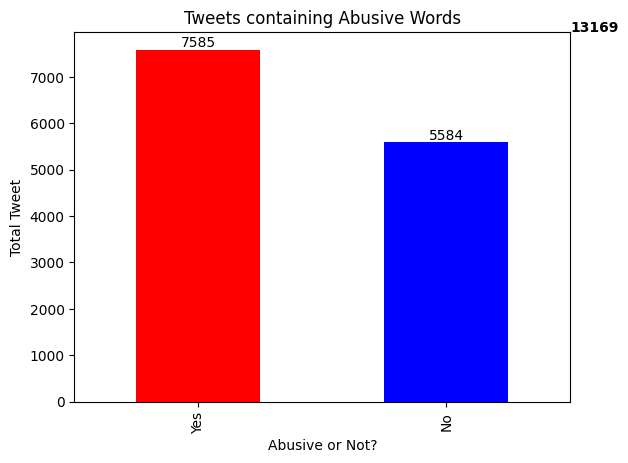

In [171]:
contains_abusive_counts = df['Contains_Abusive_Word'].value_counts()

# Create a bar plot
contains_abusive_counts.plot(kind='bar', color=['red', 'blue'])

# Add labels to the bars
for index, value in enumerate(contains_abusive_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Add title and labels to the plot
plt.title('Tweets containing Abusive Words')
plt.xlabel("Abusive or Not?")
plt.ylabel("Total Tweet")

text = df["Tweets_clean"].count()
plt.text(1, 1, text, transform=plt.gca().transAxes, fontsize=10, color='black', fontweight="bold")
# Show the bar plot
plt.show()

In [175]:
df['Contains_Abusive_Word'].value_counts()

Yes    7585
No     5584
Name: Contains_Abusive_Word, dtype: int64

### Berikut mas Tugas Chalange nya bila ada kekurangan dan kesalahan tolong di bantu info untuk perbaikan